In [11]:
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [22]:
path = os.getcwd()
file_list = os.listdir(os.path.join(path,'datasets','30sec'))

print(file_list)

['albicans_30sec.csv', 'au_30sec.csv', 'coli_30sec.csv', 'epi_30sec.csv', 'glabrata_30sec.csv', 'kp_30sec.csv', 'para_30sec.csv']


In [12]:
file_path = "datasets/incub_raw"
df = pd.read_csv(os.path.join(file_path ,'coli_wo.csv'))

In [24]:
file_path = "datasets/30sec/"
df = pd.DataFrame()
for j in file_list:
    data = pd.read_csv(os.path.join(file_path ,j))
    df = pd.concat([df,data])
    df.reset_index(drop=True)

In [13]:
# df = df.dropna(axis=1)
df

,Unnamed: 0,TGS2602,TGS2603,TGS2610,TGS2620,MQ2,MQ4,MQ7,MQ8,MQ135,cycle,label
0,4369.0,1.034000,0.361368,1.006601,1.098283,1.122341,0.977948,0.902223,1.046261,1.031556,1,1
1,4378.0,1.034000,0.361368,1.008575,1.099905,1.122341,0.984340,0.904838,1.046261,1.031556,1,1
2,4387.0,1.034000,0.361368,1.008575,1.099905,1.122341,0.984340,0.904838,1.046261,1.031556,1,1
3,4396.0,1.034000,0.361368,1.008575,1.098283,1.122341,0.977948,0.910068,1.052416,1.025108,1,1
4,4405.0,1.034000,0.361368,1.010548,1.098283,1.122341,0.977948,0.910068,1.046261,1.025108,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3636,37076.0,1.445918,0.735642,1.038181,1.148574,1.230955,1.061042,0.902223,1.126269,0.973531,15,1
3637,37085.0,1.454325,0.735642,1.042128,1.148574,1.230955,1.061042,0.904838,1.120115,0.973531,15,1
3638,NaN,1.445918,0.722736,1.042128,1.148574,1.221904,1.061042,0.899608,1.126269,0.973531,15,1
3639,NaN,1.454325,0.735642,1.042128,1.148574,1.221904,1.054650,0.904838,1.126269,0.973531,15,1


In [14]:
df = df.iloc[:,1:]
df

,TGS2602,TGS2603,TGS2610,TGS2620,MQ2,MQ4,MQ7,MQ8,MQ135,cycle,label
0,1.034000,0.361368,1.006601,1.098283,1.122341,0.977948,0.902223,1.046261,1.031556,1,1
1,1.034000,0.361368,1.008575,1.099905,1.122341,0.984340,0.904838,1.046261,1.031556,1,1
2,1.034000,0.361368,1.008575,1.099905,1.122341,0.984340,0.904838,1.046261,1.031556,1,1
3,1.034000,0.361368,1.008575,1.098283,1.122341,0.977948,0.910068,1.052416,1.025108,1,1
4,1.034000,0.361368,1.010548,1.098283,1.122341,0.977948,0.910068,1.046261,1.025108,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3636,1.445918,0.735642,1.038181,1.148574,1.230955,1.061042,0.902223,1.126269,0.973531,15,1
3637,1.454325,0.735642,1.042128,1.148574,1.230955,1.061042,0.904838,1.120115,0.973531,15,1
3638,1.445918,0.722736,1.042128,1.148574,1.221904,1.061042,0.899608,1.126269,0.973531,15,1
3639,1.454325,0.735642,1.042128,1.148574,1.221904,1.054650,0.904838,1.126269,0.973531,15,1


In [15]:
float64_cols = list(df.select_dtypes(include='float64'))
df[float64_cols] = df[float64_cols].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3641 entries, 0 to 3640
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TGS2602  3641 non-null   float32
 1   TGS2603  3641 non-null   float32
 2   TGS2610  3641 non-null   float32
 3   TGS2620  3641 non-null   float32
 4   MQ2      3641 non-null   float32
 5   MQ4      3641 non-null   float32
 6   MQ7      3641 non-null   float32
 7   MQ8      3641 non-null   float32
 8   MQ135    3641 non-null   float32
 9   cycle    3641 non-null   int64  
 10  label    3641 non-null   int64  
dtypes: float32(9), int64(2)
memory usage: 185.0 KB


## EDA
- 결측치 앞 5개 뒤 5개로 채움
- Normalization 0 ~ 1
- replace Nan to -1
- one-hot encoding

In [16]:
# df_eda = df.dropna
# # df = df.dropna(axis=0)
# df_eda = df_eda.drop_duplicates(keep='first',ignore_index=True)

# df_eda = df_eda.dropna(axis=0)
# df_eda

In [17]:
df_eda = df
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3641 entries, 0 to 3640
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TGS2602  3641 non-null   float32
 1   TGS2603  3641 non-null   float32
 2   TGS2610  3641 non-null   float32
 3   TGS2620  3641 non-null   float32
 4   MQ2      3641 non-null   float32
 5   MQ4      3641 non-null   float32
 6   MQ7      3641 non-null   float32
 7   MQ8      3641 non-null   float32
 8   MQ135    3641 non-null   float32
 9   cycle    3641 non-null   int64  
 10  label    3641 non-null   int64  
dtypes: float32(9), int64(2)
memory usage: 185.0 KB


In [8]:
print(sorted(set(df_eda.iloc[:,-1])))
encoder = LabelEncoder()
labels = encoder.fit_transform(df_eda.iloc[:,-1])
df_eda.iloc[:,-1] = labels
df_eda.iloc[:,-1].shape
df_eda['label'] = pd.to_numeric(df_eda['label']).astype('float32')


[1]


In [18]:
df_eda

,TGS2602,TGS2603,TGS2610,TGS2620,MQ2,MQ4,MQ7,MQ8,MQ135,cycle,label
0,1.034000,0.361368,1.006601,1.098283,1.122341,0.977948,0.902223,1.046261,1.031556,1,1
1,1.034000,0.361368,1.008575,1.099905,1.122341,0.984340,0.904838,1.046261,1.031556,1,1
2,1.034000,0.361368,1.008575,1.099905,1.122341,0.984340,0.904838,1.046261,1.031556,1,1
3,1.034000,0.361368,1.008575,1.098283,1.122341,0.977948,0.910068,1.052416,1.025108,1,1
4,1.034000,0.361368,1.010548,1.098283,1.122341,0.977948,0.910068,1.046261,1.025108,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3636,1.445918,0.735642,1.038181,1.148574,1.230955,1.061042,0.902223,1.126269,0.973531,15,1
3637,1.454325,0.735642,1.042128,1.148574,1.230955,1.061042,0.904838,1.120115,0.973531,15,1
3638,1.445918,0.722736,1.042128,1.148574,1.221904,1.061042,0.899608,1.126269,0.973531,15,1
3639,1.454325,0.735642,1.042128,1.148574,1.221904,1.054650,0.904838,1.126269,0.973531,15,1


In [19]:
# df.drop('cycle', axis=1,inplace=True)
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3641 entries, 0 to 3640
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TGS2602  3641 non-null   float32
 1   TGS2603  3641 non-null   float32
 2   TGS2610  3641 non-null   float32
 3   TGS2620  3641 non-null   float32
 4   MQ2      3641 non-null   float32
 5   MQ4      3641 non-null   float32
 6   MQ7      3641 non-null   float32
 7   MQ8      3641 non-null   float32
 8   MQ135    3641 non-null   float32
 9   cycle    3641 non-null   int64  
 10  label    3641 non-null   int64  
dtypes: float32(9), int64(2)
memory usage: 185.0 KB


In [20]:
df_array = np.array(df_eda)

## Train, test split

In [28]:
sequences = []
sequence_num = []
y = []
iter = 0
start = 0
end = 0
for i in range(df_array.shape[0] -1):
    if df_array[i,9] != df_array[i+1,9]:
        end = i
        print(start, end)
        sequence = df_array[start:end, 0:9]
        while sequence.shape[0] < 243:
            sequence = np.append(sequence,np.array([[0,0,0,0,0,0,0,0,0]]),axis=0)
        sequences.append(sequence)
        y.append(df_array[i,-1].tolist())
        sequence_num.append(iter)
        start = i+1
        iter = 0
    else:
        iter += 1


end = df_array.shape[0] - 1
sequence = df_array[start:end + 1, 0:9]
while sequence.shape[0] < 243:
    sequence = np.append(sequence,np.array([[0,0,0,0,0,0,0,0,0]]),axis=0)
y.append(df_array[end, -1].tolist())
sequence_num.append(iter)
sequences.append(sequence)

X = np.array(sequences)
y = np.array(y)
X_seqeunce = np.array(sequence_num)
print(X.shape)
print(y.shape)
print(X_seqeunce.shape)


0 242
243 485
486 728
729 970
971 1212
1213 1455
1456 1698
1699 1941
1942 2184
2185 2427
2428 2670
2671 2913
2914 3155
3156 3397
(15, 243, 9)
(15,)
(15,)


In [29]:
print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [30]:
max(X_seqeunce)

242

In [18]:
X_train, X_test, y_train, y_test, train_seq, test_seq = train_test_split(X, y, X_seqeunce, test_size=0.12, random_state=321)
X_train, X_val, y_train, y_val, train_seq, val_seq = train_test_split(X_train, y_train, train_seq, test_size=0.12, random_state=321)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
# y_val = y_val.reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)
print(train_seq.shape)

(11, 243, 9)
(11,)
(11,)


In [ ]:
print(X_test[1][:])
print(y_test.shape)
print(test_seq.shape)


[[1.06993389 0.49187401 0.96023279 1.04986882 1.11010528 1.00831223
  0.96280986 1.10054338 1.06927013]
 [1.08631039 0.50050336 1.05266166 1.06036747 1.11010528 1.00831223
  0.96280986 1.08525813 1.05997205]
 [1.17911077 0.49187401 1.11941576 1.07086611 1.12028968 1.03270698
  0.96280986 1.10054338 1.06927013]
 [1.28282893 0.50050336 1.1245507  1.07436574 1.11010528 1.00831223
  0.96280986 1.10054338 1.06927013]
 [1.37562931 0.50050336 1.10914588 1.07786524 1.12028968 1.00831223
  0.96280986 1.10054338 1.06927013]
 [1.41930008 0.50050336 1.0732013  1.08486438 1.11010528 1.00831223
  0.96280986 1.10054338 1.06927013]
 [1.43021774 0.51776212 1.05779648 1.08486438 1.12028968 1.02457535
  0.96280986 1.10054338 1.06927013]
 [1.43021774 0.51776212 1.04752672 1.09186351 1.11010528 1.00831223
  0.96280986 1.10054338 1.06927013]
 [1.41384125 0.51776212 1.02698696 1.09186351 1.11010528 1.01644385
  0.96280986 1.10054338 1.0785681 ]
 [1.39746463 0.52639151 1.01671708 1.09186351 1.11010528 1.00831

In [ ]:
print(X_val.shape)
print(y_val.shape)
print(val_seq.shape)

(96, 16, 9)
(96,)
(96,)


In [ ]:
label = y_train[1]
folder_dir = 'datasets/CNN_data'
full_dir_path = os.path.join(folder_dir, str(label))
print(full_dir_path)


datasets/CNN_data\2.0


(-0.75, 15.75, -0.059765625, 1.255078125)

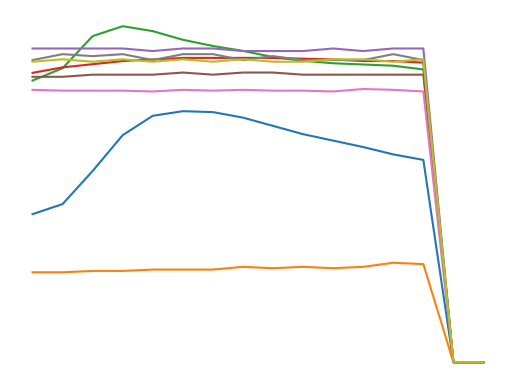

In [ ]:
first_dimension_values = X_train[1,:,:]
plt.plot(first_dimension_values)
plt.axis('off')

In [32]:
# X
for i  in range(len(X)):
    first_dimension_values = X[i,:,:]

    folder_dir = 'datasets/Incub/gram_negative'
    full_dir_path = os.path.join(folder_dir)
    
    os.makedirs(full_dir_path, exist_ok = True)

    plt.plot(first_dimension_values)
    plt.axis('off')
    plt.savefig( full_dir_path + f'/data_{i}.png')
    plt.close()

In [ ]:
# X_train shpe : (716, 243, 9)
for i  in range(len(X_train)):
    first_dimension_values = X_train[i,:,:]

    label = y_train[i]
    folder_dir = 'datasets/CNN_data/30sec/train/'
    full_dir_path = os.path.join(folder_dir, str(label))
    
    os.makedirs(full_dir_path, exist_ok = True)

    plt.plot(first_dimension_values)
    plt.axis('off')
    plt.savefig( full_dir_path + f'/data_{i}.png')
    plt.close()
    
    

In [ ]:
for i  in range(len(X_test)):
    first_dimension_values = X_test[i,:,:]

    label = y_test[i]
    folder_dir = 'datasets/CNN_data/30sec/test/'
    full_dir_path = os.path.join(folder_dir, str(label))
    
    os.makedirs(full_dir_path, exist_ok = True)

    plt.plot(first_dimension_values)
    plt.axis('off')
    plt.savefig( full_dir_path + f'/data_{i}.png')
    plt.close()

In [ ]:
for i  in range(len(X_val)):
    first_dimension_values = X_val[i,:,:]

    label = y_val[i]
    folder_dir = 'datasets/CNN_data/30sec/valid/'
    full_dir_path = os.path.join(folder_dir, str(label))
    
    os.makedirs(full_dir_path, exist_ok = True)

    plt.plot(first_dimension_values)
    plt.axis('off')
    plt.savefig( full_dir_path + f'/data_{i}.png')
    plt.close()

## Build Model

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.models as models


In [2]:
train_transform = torchvision.transforms.Compose([
                                                transforms.Resize((128,128)),
                                                transforms.ToTensor()
])

val_transform = torchvision.transforms.Compose([
                                                transforms.Resize((128,128)),
                                                transforms.ToTensor()
])

In [3]:
# train 데이터 경로와 validation 데이터 경로 설정
train_path = "./datasets/CNN_data/1min/train"
val_path = "./datasets/CNN_data/1min/valid"

# torchvision.datasets.ImageFolder를 사용하여 지정된 경로에 폴더 별로 라벨링을 진행
train_data = torchvision.datasets.ImageFolder(train_path, transform=train_transform)
val_data = torchvision.datasets.ImageFolder(val_path, transform=val_transform)


# 폴더별로 라벨링이 잘 되었는지 확인
class_to_id = train_data.class_to_idx
class_to_id = val_data.class_to_idx
train_data.class_to_idx
val_data.class_to_idx

{'0.0': 0, '1.0': 1, '2.0': 2, '3.0': 3, '4.0': 4, '5.0': 5, '6.0': 6}

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
# pretrained된 resnet50을 불러옴
resnet50_pretrained = models.resnet50(pretrained=True)


num_classes = 7


# ResNet의 마지막 layer는 1000개의 class를 구분하는 task이기 때문에 마지막 layer를 설정한 num_classes 로 변경해주어 GPU에 넣음
num_ftrs = resnet50_pretrained.fc.in_features
resnet50_pretrained.fc = torch.nn.Linear(num_ftrs, num_classes)
resnet50_pretrained.to(device)

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
# 학습을 위한 package import
import torch
import wandb
import sklearn
from sklearn import metrics
import datetime
import numpy as np
import os
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score


In [7]:
# 하이퍼 파라미터 설정

# loss 함수 설정
criterion = torch.nn.CrossEntropyLoss()

# optimizer 설정
optimizer_ft = optim.SGD(resnet50_pretrained.parameters(), lr=0.001, weight_decay=5e-4, momentum=0.9)

# scheduler 설정
scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.5)

In [8]:
# 데이터 불러오기 위한 dataloader, train, validation에 관한 각각의 dataloader를 적용
batch_size = 128 # 한번에 불러올 데이터의 batch 사이즈
dataloader_train = DataLoader(train_data, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(val_data, batch_size=batch_size, shuffle=True)

## Train Model

In [9]:
# wandb에 로그인 하기
wandb.login()

# wandb에 기록될 이름
name = "7 types_1min_CNN"

# 설정한 이름과 프로젝트 이름을 기반으로 wandb 실행
wandb.init(project="VOC_classification", name=name)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: hjchan7777. Use `wandb login --relogin` to force relogin


In [10]:
# train과 validation을 위한 함수
def train_model(model, criterion, optimizer, scheduler, num_epochs=50):
    best_acc = 0
    valid_loss_min = np.Inf        
    for epoch in range(num_epochs):                      # 설정한 num_epoch 만큼 학습 epoch을 진행
        print(f'Epoch {epoch}/{num_epochs - 1}')         # 학습 진행시 현재 epoch을 보기 위한 print
        print('-' * 20)
        train_loss = 0.0                                 # train_loss값의 초기 값 설정
        train_acc = 0                                    # train_acc값의 초기 값 설정                             
        model.train()                                 # 모델을 학습 모드로 설정
        iter = 0
        pred_list = []                                     
        target_list = []  
        for inputs, labels in dataloader_train:          # data에 관한 iteration 진행, dataloader로 부터 input값과 대응되는 label (0 or 1)을 불러옴

                inputs = inputs.to(device)
                labels = labels.to(device)      # input과 label을 계산을 위해 device(gpu) 로 올려주는 설정

                optimizer.zero_grad()           # back propagate를 진행할 때 값이 지속적으로 더해지므로 초기 값을 0으로 초기화 하는 설정

                pred = model(inputs)            # input을 모델에 넣음으로 나온 예측(pred) 값 추출
    
                loss = criterion(pred, labels)                   # 예측값과 정답 라벨간의 차이를 계산하여 loss 계산
                y_pred_tag = pred.max(1)[1]    
                                 
                correct_results_sum = (y_pred_tag == labels).sum().float()     # 예측값과 정답 라벨값이 일치하는 개수를 새기 위한 코드
                acc = correct_results_sum/labels.shape[0]                      # 예측값과 정답 라벨값이 일치하는 비율을 계산
                acc = torch.round(acc * 100)                                                # %로 정확도 계산

                loss.backward()                                                            # loss를 backward로 미분하여 loss 함수에 끼친 영향력을 구함
                optimizer.step()                                                            # 계산된 영향력을 기반으로 loss 함수에 관해 최적화를 진행

                # 통계
                train_loss += loss.item()                                                   # 계산된 loss를 전부 더함
                train_acc += acc.item()

                iter +=1                                                  # 계산된 accuaracy를 전부 더함

        model.eval()                  # 모델을 validation 모드로 설정. 이하 위의 학습코드와 거의 동일함
        with torch.no_grad():
                val_loss = 0.0
                val_acc = 0.0
                for val_input, val_label in dataloader_val:
                    val_inputs = val_input.to(device)
                    val_labels = val_label.to(device)

                    val_output = model(val_inputs)

                    v_loss = criterion(val_output, val_labels)
                    
                    y_pred_tag = val_output.max(1)[1]
                    correct_results_sum = (y_pred_tag == val_labels).sum().float()
                    acc = correct_results_sum/val_labels.shape[0]
                    acc = torch.round(acc * 100)

                    val_loss += v_loss
                    val_acc += acc.item()
                    pred_list.append(y_pred_tag.detach().cpu().numpy())
                    target_list.append(val_labels.detach().cpu().numpy())

        scheduler.step()                                # learning rate를 epoch마다 조정 (최적화된 learning rate를 찾기 위함)

        pred_list = np.concatenate(pred_list, axis=0)
        target_list = np.concatenate(target_list, axis=0)
        precision = precision_score(pred_list, target_list, average='weighted')
        f1 = f1_score(pred_list, target_list, average='weighted')
        recall = recall_score(pred_list, target_list, average='weighted')
       

        # data = [[val_inputs, val_labels] for (val_inputs, val_labels) in zip(fpr, tpr)]         # ROC 커브를 그리기 위한 코드
        # table = wandb.Table(data=data, columns = ["false positive rate", "true positive rate"])

        print(f'train Acc: {train_acc/len(dataloader_train):.3f}, train Loss: {train_loss/len(dataloader_train):.5f}')              #학습 시 train loss와 acc의 값을 보기위한 코드
        print(f'validation Acc: {val_acc/len(dataloader_val):.3f}, validation Loss: {val_loss/len(dataloader_val):.5f}')            #학습 시 validation loss와 acc의 값을 보기위한 코드
        print('\n')

        # WanDB에 값을 기록하기 위한 코드
        wandb.log({
          "train_loss": train_loss/len(dataloader_train),
          "val_loss": val_loss/len(dataloader_val),
          "train_acc": train_acc/len(dataloader_train),
          "val_acc": val_acc/len(dataloader_val),
          "precision":precision,
          'recall':recall,
          'f1':f1
        })
        if val_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            val_loss))
            
            # 모델을 파일로 저장하기 위한 코드
            state = {
                'state_dict': model.state_dict()
            }
            
            torch.save(state, 'Model_7_1min.pth')
            valid_loss_min = val_loss

    return model

In [11]:
# train과 validation을 실행
model_ft = train_model(resnet50_pretrained, criterion, optimizer_ft, scheduler, num_epochs=50)

Epoch 0/49
--------------------


c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train Acc: 17.167, train Loss: 1.98680
validation Acc: 12.000, validation Loss: 2.00738


Validation loss decreased (inf --> 2.007378).  Saving model ...
Epoch 1/49
--------------------


c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train Acc: 44.333, train Loss: 1.61337
validation Acc: 9.000, validation Loss: 2.15917


Epoch 2/49
--------------------


c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train Acc: 67.833, train Loss: 1.29144
validation Acc: 11.000, validation Loss: 2.06604


Epoch 3/49
--------------------


c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train Acc: 87.333, train Loss: 0.99066
validation Acc: 30.000, validation Loss: 1.89483


Validation loss decreased (2.007378 --> 1.894830).  Saving model ...
Epoch 4/49
--------------------


c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train Acc: 90.167, train Loss: 0.72614
validation Acc: 33.000, validation Loss: 1.81209


Validation loss decreased (1.894830 --> 1.812091).  Saving model ...
Epoch 5/49
--------------------


c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


train Acc: 94.833, train Loss: 0.53877
validation Acc: 39.000, validation Loss: 1.72663


Validation loss decreased (1.812091 --> 1.726625).  Saving model ...
Epoch 6/49
--------------------
train Acc: 96.500, train Loss: 0.44233
validation Acc: 54.000, validation Loss: 1.56811


Validation loss decreased (1.726625 --> 1.568109).  Saving model ...
Epoch 7/49
--------------------
train Acc: 97.500, train Loss: 0.36805
validation Acc: 66.000, validation Loss: 1.27693


Validation loss decreased (1.568109 --> 1.276928).  Saving model ...
Epoch 8/49
--------------------
train Acc: 98.500, train Loss: 0.30708
validation Acc: 77.000, validation Loss: 0.95153


Validation loss decreased (1.276928 --> 0.951532).  Saving model ...
Epoch 9/49
--------------------
train Acc: 99.167, train Loss: 0.24453
validation Acc: 82.000, validation Loss: 0.77481


Validation loss decreased (0.951532 --> 0.774809).  Saving model ...
Epoch 10/49
--------------------
train Acc: 99.667, train Loss: 0.20922
valid

## Model Evaluation

In [12]:
# test 위한 package 불러옴
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
from torchvision import transforms, datasets
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
# from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from PIL import Image
from torchvision.transforms import transforms
from torchvision.transforms.transforms import CenterCrop
from torchvision.transforms.transforms import Resize


# test 위한 transforms 설정
test_transform =  torchvision.transforms.Compose([
                                                transforms.Resize((128,128)),
                                                transforms.ToTensor()
])

In [13]:
# 1. 데이터 준비
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

test_path = "./datasets/CNN_data/1min/test"

# test data를 ImageFolder를 이용해 불러오고 Dataloader에 올리기
test_data = ImageFolder(root=test_path,
                         transform=test_transform,
                         target_transform=None)
test_loader = DataLoader(dataset=test_data,
                         batch_size=1)

In [15]:
# 2. 모델 불러오기
import torchvision.models as models
import torch.nn as nn

model = models.resnet50(pretrained=True, progress=True)

# 마지막 layer를 7로 설정
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 7)
model.to(device)
print(model)

# 학습한 모델을 불러옴
state = torch.load('weights/Model_7_1min.pth')
model.load_state_dict(state['state_dict'])

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

<All keys matched successfully>

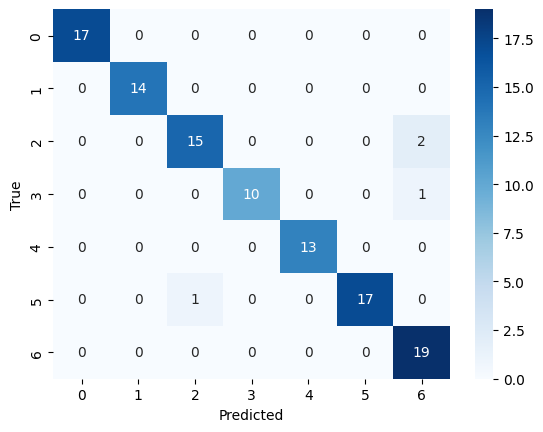

test accuarcy: 96.3302752293578 %
f1: 0.9630623273943928.. precision: 0.9657257954613594
recall: 0.963302752293578%


In [16]:
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# 모델에 테스트 이미지를 넣기 위한 함수
def test_model(x, y, model):

  with torch.no_grad():
    model.eval()            # evaluation 모드로 설정
    pred = model(x)         # 인풋에 대응하는 결과 추출 
                                 
    y_pred_tag = pred.max(1)[1]
    correct_results_sum = (y_pred_tag == y).sum().float()     # 예측값과 정답 라벨값이 일치하는 개수를 새기 위한 코드
    acc = correct_results_sum/y.shape[0]                      # 예측값과 정답 라벨값이 일치하는 비율을 계산
    acc = torch.round(acc * 100)
    


  return acc, y_pred_tag.detach().cpu().numpy()

pred_list = []                                     
target_list = [] 
test_acc = 0
for test_input, test_label in test_loader:
  a = test_input.to(device)
  b = test_label.to(device)
  c = int(test_label.cpu())
  acc, pred = test_model(a, b, model)


  pred_list.append(pred)
  target_list.append(test_label)
  
  y_pred_tag = pred
  test_acc += acc.item()
  # plt.title(f'predicted label is {y_pred_tag}. and real label is {c}')

  # plt.imshow(a.squeeze().permute(1,2,0).cpu())
  # plt.show()
pred_list = np.concatenate(pred_list, axis=0)
target_list = np.concatenate(target_list, axis=0)
precision_cnn = precision_score(pred_list, target_list, average='weighted')
f1_cnn = f1_score(pred_list, target_list, average='weighted')
recall_cnn = recall_score(pred_list, target_list, average='weighted')
cm = confusion_matrix(target_list, pred_list)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("test accuarcy:", (test_acc/len(test_loader)),"%")
print(f"f1: {f1_cnn}.. precision: {precision_cnn}")
print(f"recall: {recall_cnn}%")


In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()

    def forward(self, x):
        return x

tsne = TSNE()

model.fc = Identity()    

In [ ]:
batch_size = 908 
dataloader_train = DataLoader(train_data, batch_size=batch_size, shuffle=True)
actual = []
deep_features = []

model.eval()
with torch.no_grad():
    for data in dataloader_train:
        images, labels = data[0].to(device), data[1].to(device)
        features = model(images) 

        deep_features += features.cpu().numpy().tolist()
        actual += labels.cpu().numpy().tolist()

tsne = TSNE(n_components=2, random_state=0) 
cluster = np.array(tsne.fit_transform(np.array(deep_features)))
actual = np.array(actual)


NameError: name 'train_data' is not defined

NameError: name 'actual' is not defined

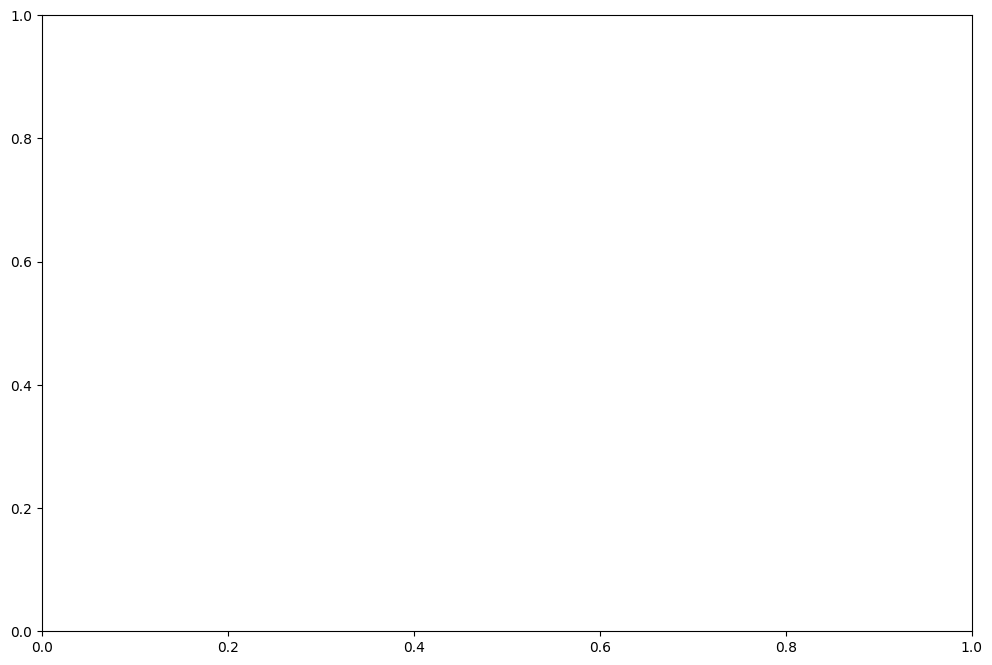

In [ ]:
sns.set_palette("bright")
fig ,ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('none') 

cifar = ['arbicans', 'aureus', 'coli', 'epidermidis', 'glabrata', 'kp', 'para']
for i, label in zip(range(7), cifar):
    idx = np.where(actual == i)
    ax.scatter(cluster[idx, 0], cluster[idx, 1], s=10, label=label)
ax.set_title('Visualization of Deep Features')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()

plt.show()

In [24]:
import torch.nn.functional as F

# 모델에 테스트 이미지를 넣기 위한 함수
def test_model(x, y, model):

  with torch.no_grad():
    model.eval()            # evaluation 모드로 설정
    pred = model(x)         # 인풋에 대응하는 결과 추출 
                                 
    y_pred_tag = pred.max(1)[1]
    correct_results_sum = (y_pred_tag == y).sum().float()     # 예측값과 정답 라벨값이 일치하는 개수를 새기 위한 코드
    acc = correct_results_sum/y.shape[0]                      # 예측값과 정답 라벨값이 일치하는 비율을 계산
    acc = torch.round(acc * 100)
    


  return acc, y_pred_tag.detach().cpu().numpy()

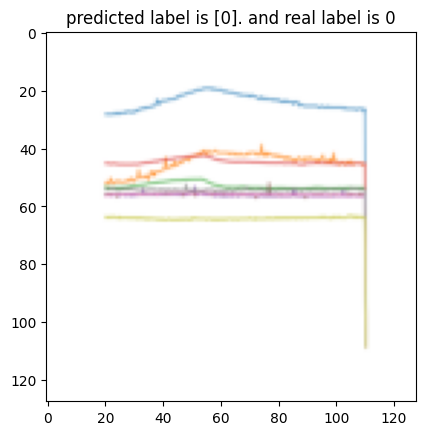

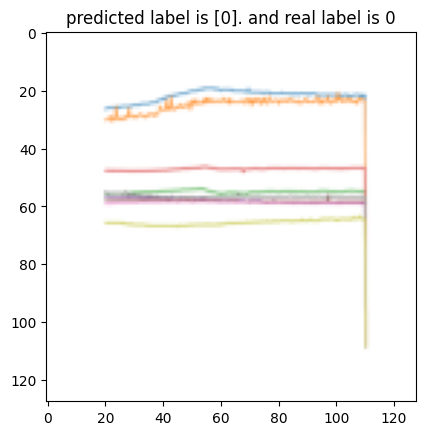

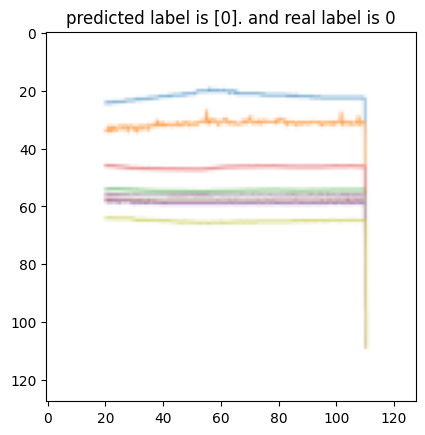

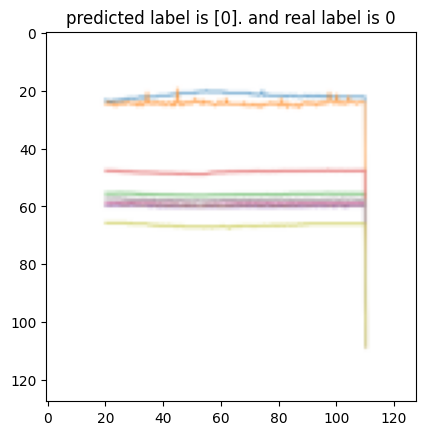

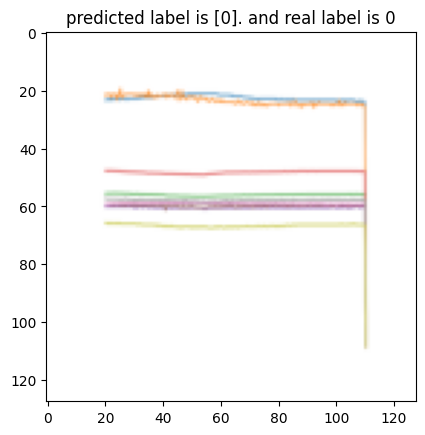

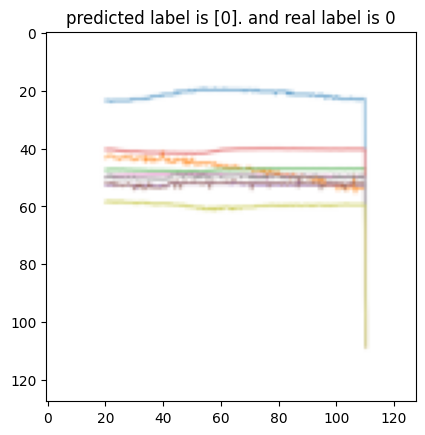

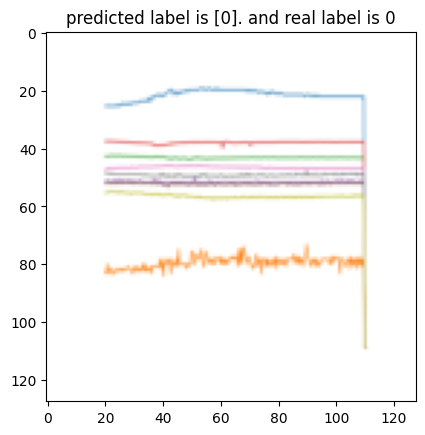

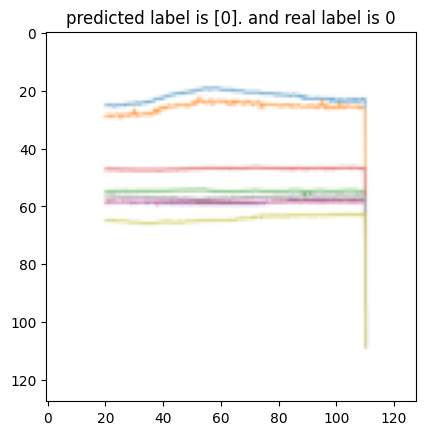

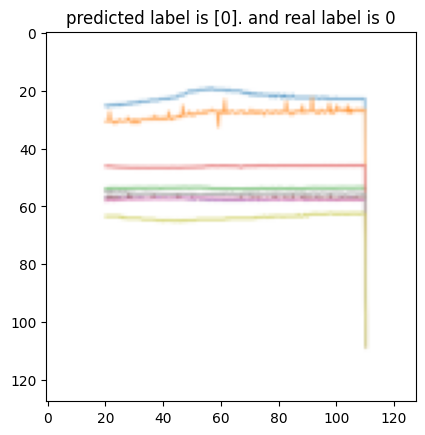

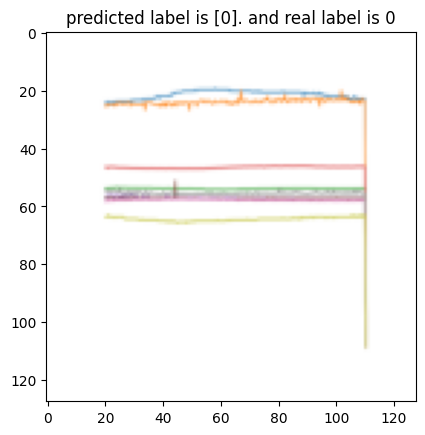

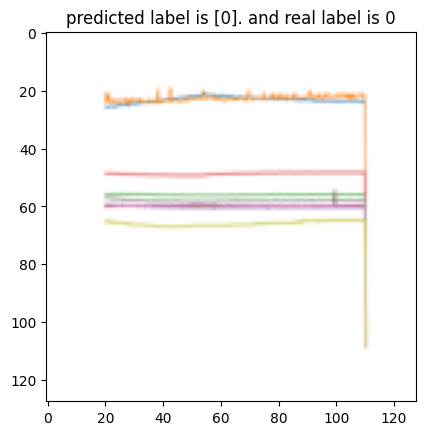

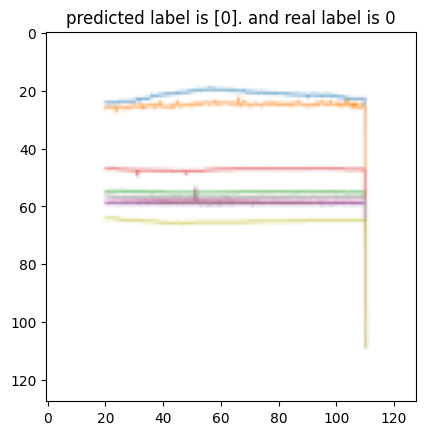

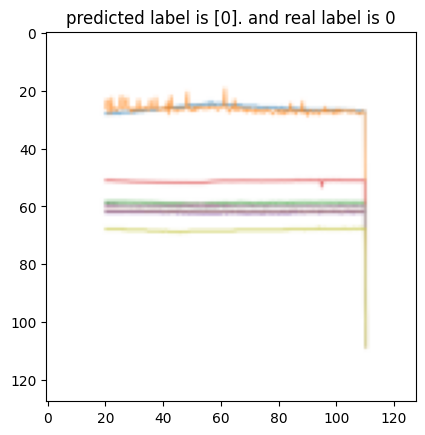

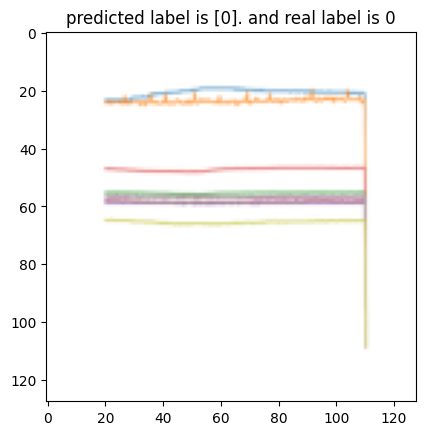

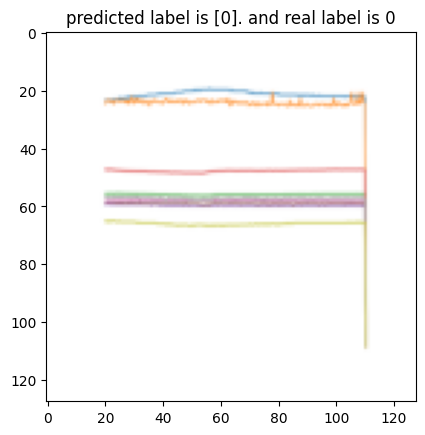

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


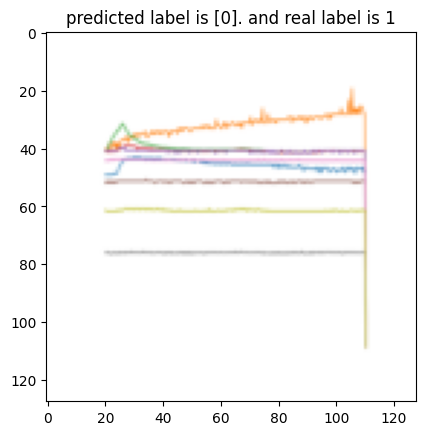

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


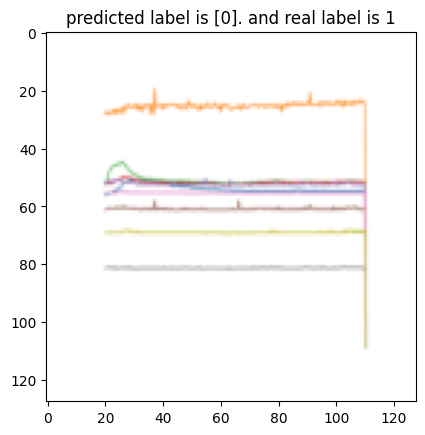

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


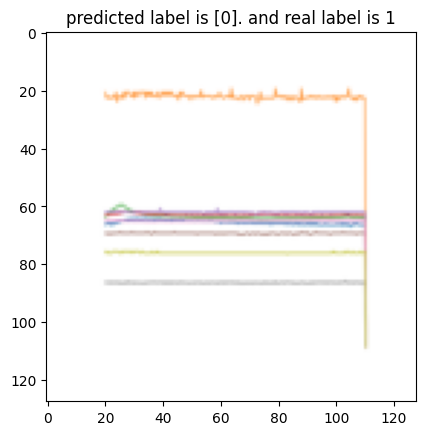

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


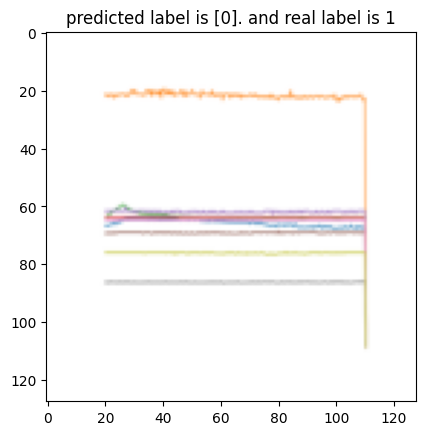

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


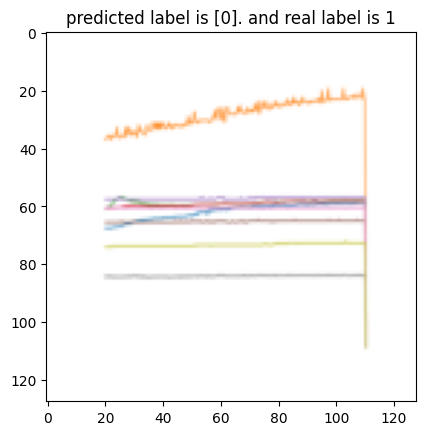

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


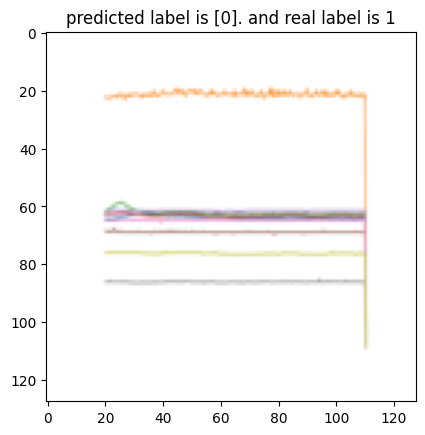

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


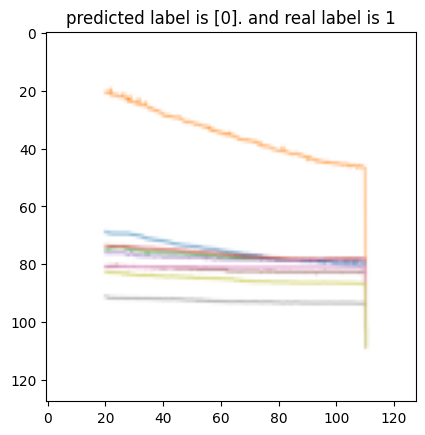

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


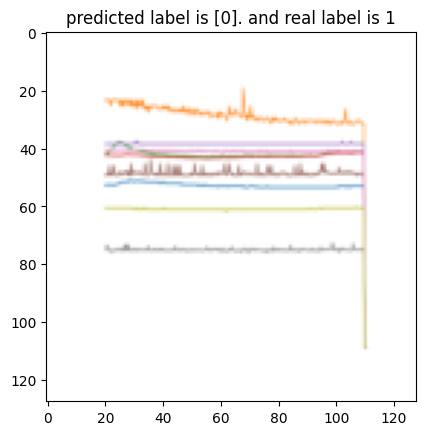

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


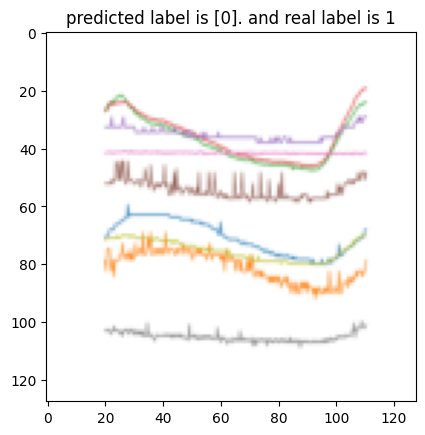

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


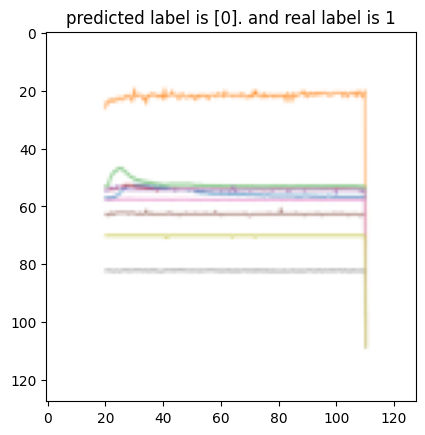

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


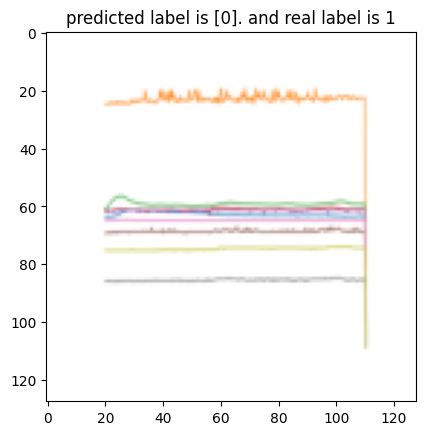

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


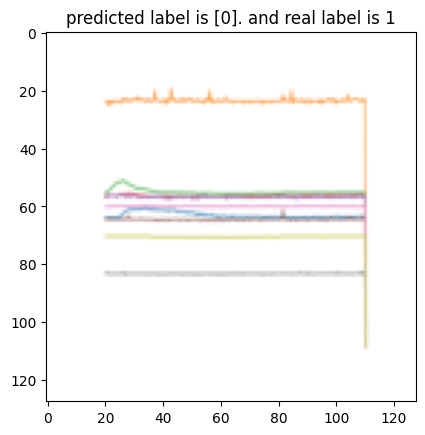

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


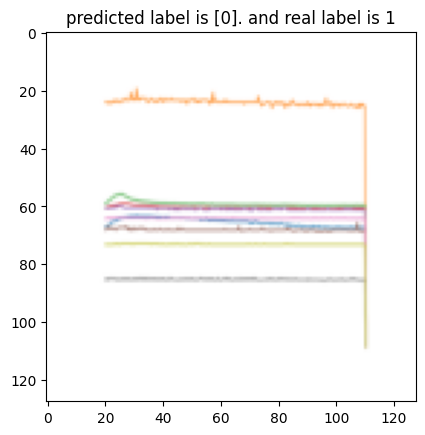

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


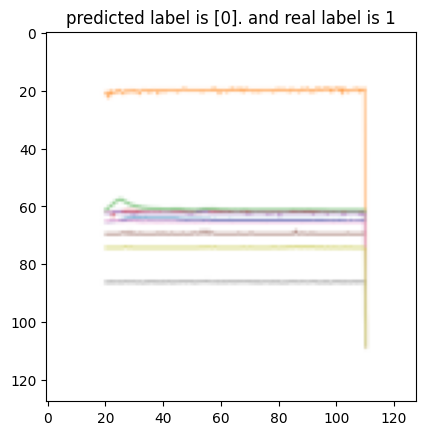

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


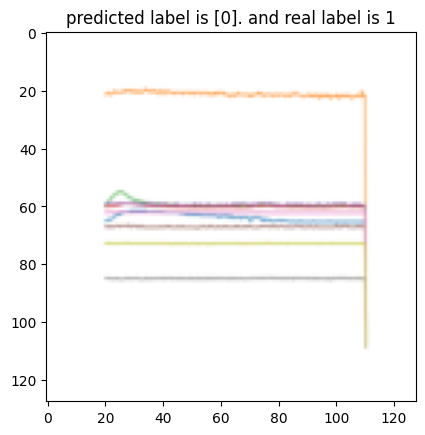

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


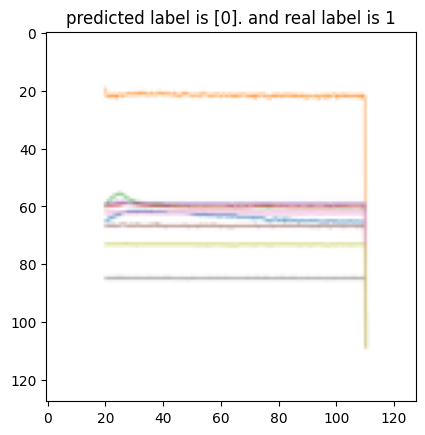

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


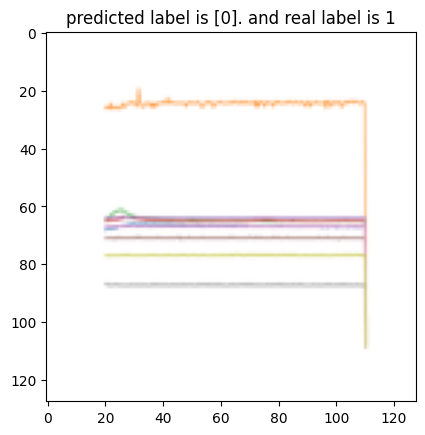

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


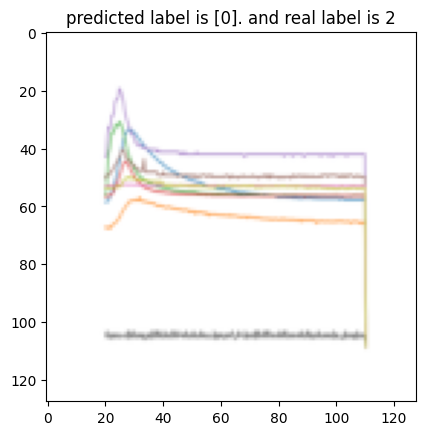

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


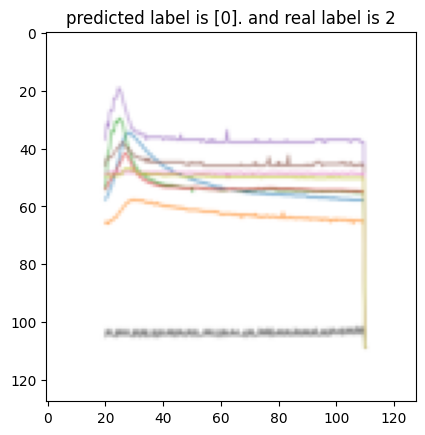

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


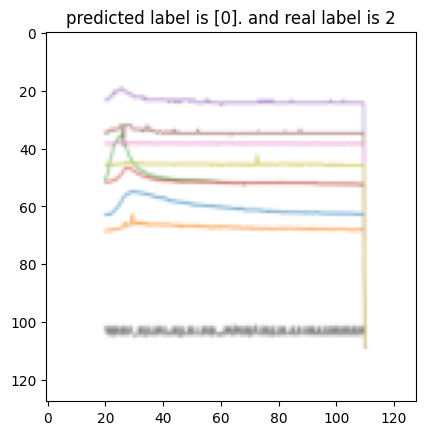

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


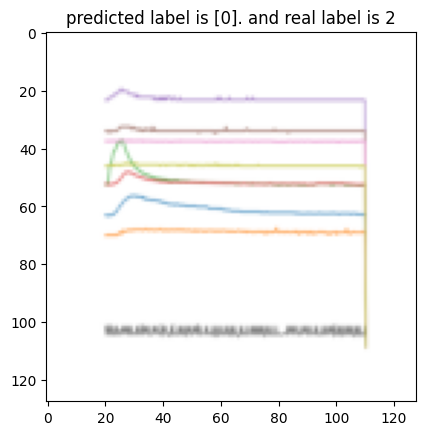

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


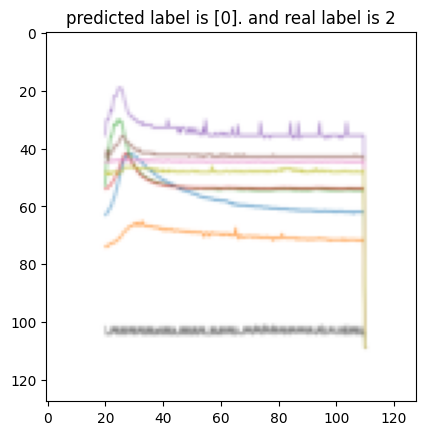

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


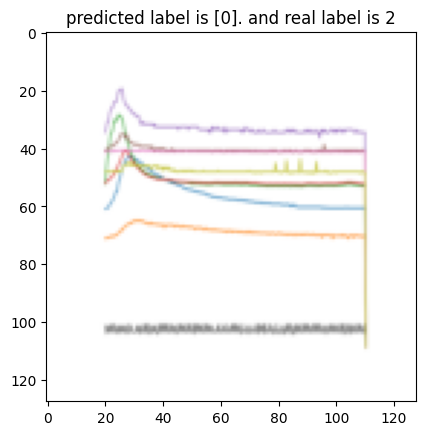

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


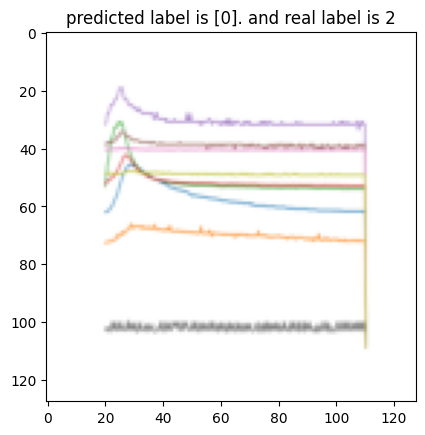

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


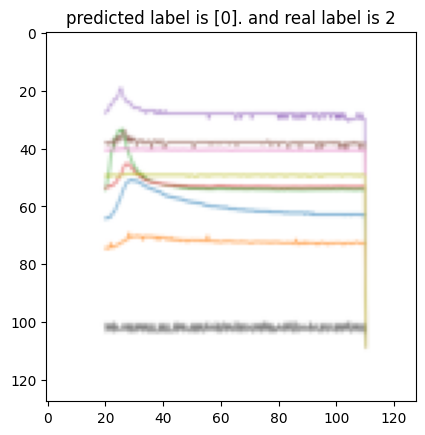

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


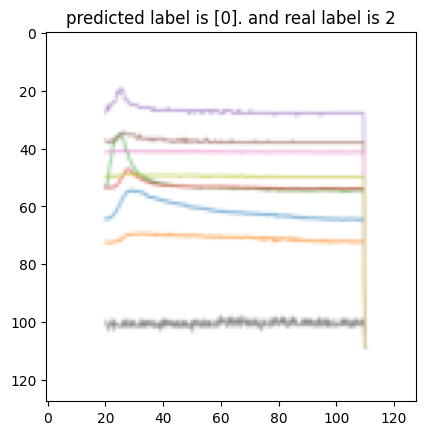

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


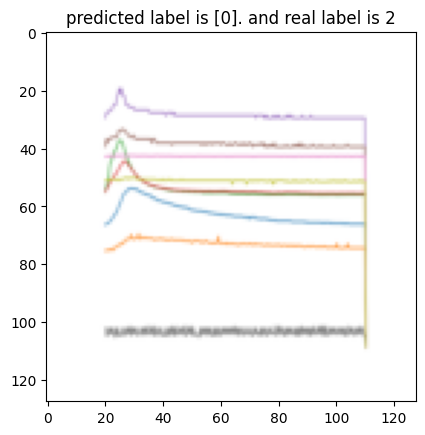

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


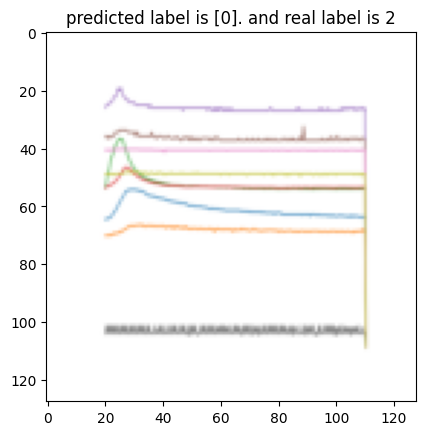

c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Juchan\anaconda3\envs\torch\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


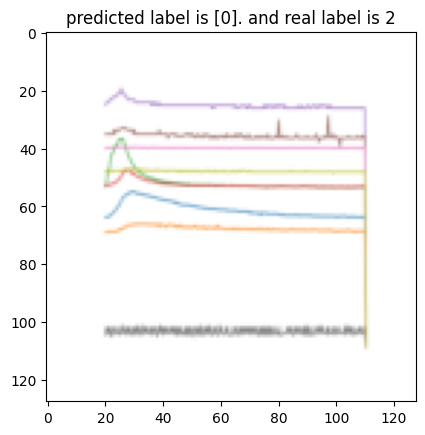

test accuarcy: 34.09090909090909 %
f1: 0.0.. precision: 0.0
recall: 0.0%


In [26]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

test_acc = 0
for test_input, test_label in test_loader:
  a = test_input.to(device)
  b = test_label.to(device)
  c = int(test_label.cpu())
  acc, pred = test_model(a, b, model)
  pred_list = []                                     
  target_list = [] 

  pred_list.append(pred)
  target_list.append(test_label)
  pred_list = np.concatenate(pred_list, axis=0)
  target_list = np.concatenate(target_list, axis=0)

  y_pred_tag = pred
  test_acc += acc.item()

  precision_cnn = precision_score(pred_list, target_list, average='weighted')
  f1_cnn = f1_score(pred_list, target_list, average='weighted')
  recall_cnn = recall_score(pred_list, target_list, average='weighted')
  plt.title(f'predicted label is {y_pred_tag}. and real label is {c}')

  plt.imshow(a.squeeze().permute(1,2,0).cpu())
  plt.show()

print("test accuarcy:", (test_acc/len(test_loader)),"%")
print(f"f1: {f1_cnn}.. precision: {precision_cnn}")
print(f"recall: {recall_cnn}%")


In [ ]:
import pandas as pd
results = pd.DataFrame({
    'Model': ['ResNet'],
    'Accuracy': [test_acc/len(test_loader)],
    'Recall': [recall_cnn],
    'precision': [precision_cnn],
    'f1_score': [f1_cnn]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Accuracy,Recall,precision,f1_score
Model,,,,
ResNet,14.757709,0.0,0.0,0.0


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())